In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleAdvertisement():
    """ Representation of a simple advertisement."""
    
    def __init__(self, p):
        self.p = p

    def show(self):
        return np.random.binomial(n=1, p=self.p)

In [3]:
advertisement_one = SimpleAdvertisement(0.01)
advertisement_two = SimpleAdvertisement(0.024)
advertisement_three = SimpleAdvertisement(0.03)
advertisements = [advertisement_one, advertisement_two, advertisement_three]

In [4]:
num_prod = 50000
num_ads = len(advertisements)
N_impres = np.zeros(num_ads, dtype=int)
Q_values = np.zeros(num_ads)
reward_sum = 0

In [5]:
def a_b_n_test(num_test, ads):
    global reward_sum
    for test in range(num_test):
        chosen_ad_idx = np.random.randint(len(ads))
        chosen_ad = ads[chosen_ad_idx]
        reward = chosen_ad.show()
        N_impres[chosen_ad_idx] = N_impres[chosen_ad_idx] + 1
        Q_values[chosen_ad_idx] += (1 / N_impres[chosen_ad_idx]) * (reward - Q_values[chosen_ad_idx])
        reward_sum += reward
        average_reward_so_far = reward_sum / (test + 1)
    return average_reward_so_far

In [6]:
def ad_scenario(num_tests):
    a_b_n_test(num_tests, advertisements)
    best_ad_index = np.argmax(Q_values)
    return Q_values[best_ad_index]

Number of Exploration Steps: 500 | Average Reward: 0.021621621621621623
Number of Exploration Steps: 1000 | Average Reward: 0.0311111111111111
Number of Exploration Steps: 2000 | Average Reward: 0.03623188405797101
Number of Exploration Steps: 5000 | Average Reward: 0.02798982188295162
Number of Exploration Steps: 10000 | Average Reward: 0.02750621375310687
Number of Exploration Steps: 20000 | Average Reward: 0.029125451405244102
Number of Exploration Steps: 50000 | Average Reward: 0.029956186529905365


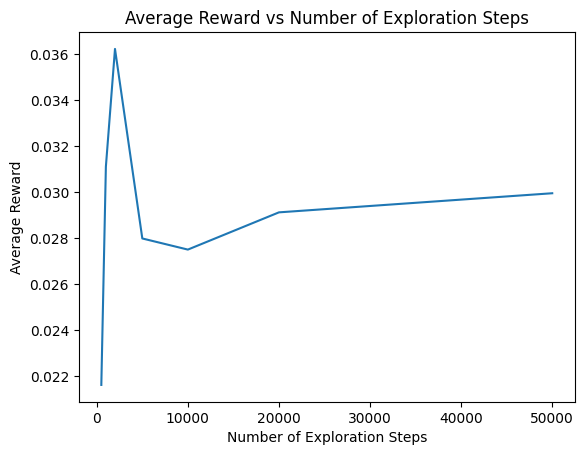

In [7]:
if __name__ == '__main__':
    num_tests_list = [500, 1000, 2000, 5000, 10000, 20000, 50000]
    average_rewards = []
    for num_tests in num_tests_list:
        average_reward = ad_scenario(num_tests)
        average_rewards.append(average_reward)
        print(f"Number of Exploration Steps: {num_tests} | Average Reward: {average_reward}")
    
    # Plot the results
    plt.plot(num_tests_list, average_rewards)
    plt.xlabel('Number of Exploration Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward vs Number of Exploration Steps')